# Iris_classification

 **Libraries and Data Loading**

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import plot_tree

# Load the dataset
df = pd.read_csv("Iris.csv")

# Display the first 5 rows
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Data Cleaning and Visualization

Missing values in each column:
 SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


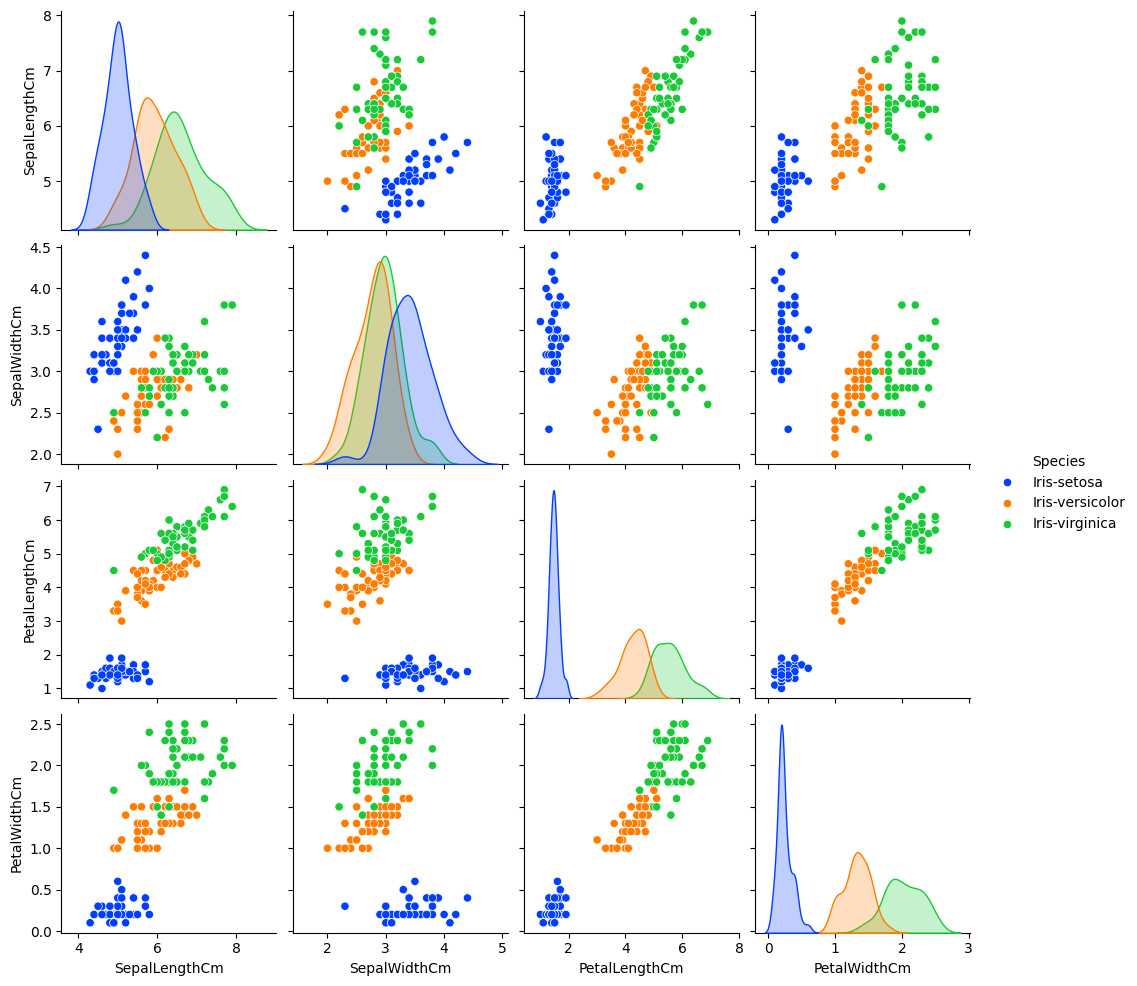

In [13]:
# 1. Drop the 'Id' column as it's not a feature
if 'Id' in df.columns:
    df = df.drop('Id', axis=1)

# 2. Check for missing values (good practice)
print("Missing values in each column:\n", df.isnull().sum())

# 3. Create a pairplot to visualize the data distribution
sns.pairplot(df, hue="Species", palette="bright")
plt.show()

**Data Splitting and Model Training**

In [14]:
# 1. Define Features (X) and Target (y)
X = df.drop('Species', axis=1)
y = df['Species']

# 2. Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Initialize and Train the Model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

print("Model Training Complete!")
print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")

Model Training Complete!
Training samples: 120
Testing samples: 30


**Model Evaluation and Confusion Matrix**

Model Accuracy: 100.00%

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



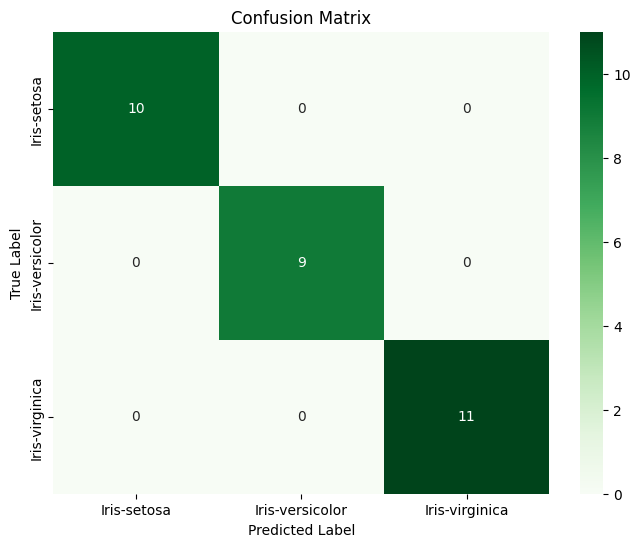

In [15]:
# 1. Make predictions on the test data
y_pred = model.predict(X_test)

# 2. Calculate and print Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# 3. Print the Classification Report for detailed metrics
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 4. Plotting the Confusion Matrix
plt.figure(figsize=(8,6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=df['Species'].unique(),
            yticklabels=df['Species'].unique())
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**Plot_tree**

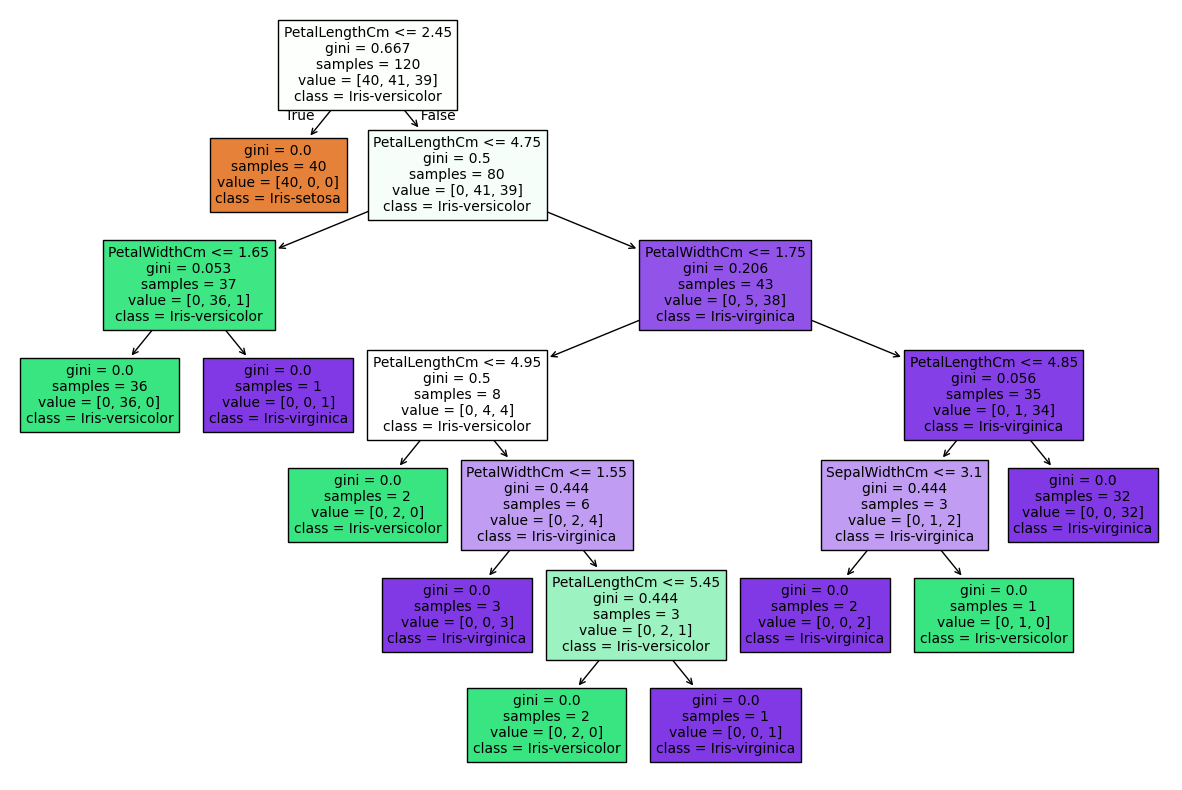

In [16]:
plt.figure(figsize=(15,10))
plot_tree(model, feature_names=X.columns, class_names=df['Species'].unique(), filled=True)

plt.savefig('decision_tree.png')

plt.show()

**Manual Testing (Live Prediction)**

In [17]:
import numpy as np

# 1. Input custom values [SepalLength, SepalWidth, PetalLength, PetalWidth]
# You can change these numbers to test different flowers!
custom_input = np.array([[5.1, 3.5, 1.4, 0.2]])

# 2. Predict the species
prediction = model.predict(custom_input)

print(f"Input Measurements: {custom_input[0]}")
print(f"Predicted Species: {prediction[0]}")

Input Measurements: [5.1 3.5 1.4 0.2]
Predicted Species: Iris-setosa


c:\Users\rizwa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
